# Focusing notebook
Results in focused beam on the camera. 
Important: make sure the rotation of the camera is correct, check by either moving the camera or steering the beam

In [1]:
import sys
sys.path.append('/sf/cristallina/applications/slic/cristallina/crq_exp/')
from tqdm.notebook import tqdm

%cd /sf/cristallina/applications/slic/cristallina
%run /sf/cristallina/applications/slic/cristallina/cristallina.py

2025-05-01 at 15:26:19 | INFO | Loading started.
2025-05-01 at 15:26:19 | WARNING | Cannot write log file to snapshots.
2025-05-01 at 15:26:19 | WARNING | [Errno 13] Permission denied: '/sf/cristallina/applications/beamline/snapshots/slic_logs/cristallina.log'


/gfa/.mounts/sf_cristallina/applications/slic/cristallina
]0;⊚sliccould not set up DBusNotify: org.freedesktop.DBus.Error.ServiceUnknown: The name org.freedesktop.Notifications was not provided by any .service files


2025-05-01 at 15:26:21 | WARNING | No transmission value reported from SARFE10-OATT053
2025-05-01 at 15:26:21 | WARNING | No transmission value reported from SAROP31-OATA150
2025-05-01 at 15:26:22 | INFO | Using undulator (Aramis) offset to PSSS energy of 0 eV.
2025-05-01 at 15:26:22 | INFO | Photon energy offsets: PSSS -8 eV , DCCM -12 eV, undulator -16 eV.
2025-05-01 at 15:26:22 | WARNING | Error: Could not connect to dilution fridge. name 'Dilution' is not defined
2025-05-01 at 15:26:22 | INFO | Connected to stand server
2025-05-01 at 15:26:22 | WARNING | Cannot write log file to pgroup p22259.
2025-05-01 at 15:26:22 | INFO | Using CristallinaQ setup for detectors.
2025-05-01 at 15:26:22 | INFO | Running at cristallina with pgroup p22259. Experiment type: Q.
2025-05-01 at 15:26:22 | INFO | Loading finished.


SAT functions


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
import threading
from queue import Queue
from beamline.kb_focusing import kbV_focusing_acquire, kbH_focusing_acquire, kb_focusing_acquire, ReadData, plotdata

## Horizontal focus first

Mesurement is run in a thread, if you want to stop the measurement, stop with **stop_measurement.set()**

In [3]:
stop_measurement=threading.Event()
intermediate_results = []
out_fpath = Queue()

In [4]:
thr=threading.Thread( target=kbH_focusing_acquire,
                      args=(intermediate_results,stop_measurement,out_fpath),
                      kwargs={
    'bender_ds_center': 1.6,
    'bender_us_center': 1.8, 
    'bender_us_span'  : 0.5,
    'bender_ds_span'  : 0.5,
    'bender_npoints'  : 3,
    'bender_us_start' : None,
    'bender_ds_start' : None,
    'aperture_center' : 0,
    'aperture_span'   : 0.3,
    'aperture_npoints': 3,
    'aperture_narrow_dimension' : 0.15,
    'aperture_wide_dimension'   : 2,
    'n_pulses'        : 1,
    'camera_name'     : 'SARES30-CAMS156-XE',
})
thr.start()

2025-05-01 at 15:26:23 | INFO | BU/BD sent to start
2025-05-01 at 15:26:26 | INFO | BU to start:  1.000
2025-05-01 at 15:26:26 | INFO | BD to start:  0.800
2025-05-01 at 15:26:26 | INFO | 
2025-05-01 at 15:26:36 | INFO |       BU / BD positions =  1.300 /  1.100
2025-05-01 at 15:26:38 | INFO |         Aperture position = -0.300; Beam position = 1353.178
2025-05-01 at 15:26:41 | INFO |         Aperture position =  0.000; Beam position = 1361.812
2025-05-01 at 15:26:44 | INFO |         Aperture position =  0.300; Beam position = 1354.503
2025-05-01 at 15:27:00 | INFO |       BU / BD positions =  1.300 /  1.600
2025-05-01 at 15:27:01 | INFO |         Aperture position = -0.300; Beam position = 1354.479
2025-05-01 at 15:27:04 | INFO |         Aperture position =  0.000; Beam position = 1359.144
2025-05-01 at 15:27:08 | INFO |         Aperture position =  0.300; Beam position = 1354.953
2025-05-01 at 15:27:23 | INFO |       BU / BD positions =  1.300 /  2.100
2025-05-01 at 15:27:24 | INFO |

In [5]:
#stop_measurement.set()

In [ ]:
# Load and plot intermediate data
d_intermediate = ReadData(intermediate_results)
intermediate_results

plotdata(d_intermediate,Plot3D=True,PlotContour=False)

open file: /sf/cristallina/applications/beamline/snapshots/KBs/2025-05-01/C_2025-05-01T15:26_horizontal.json


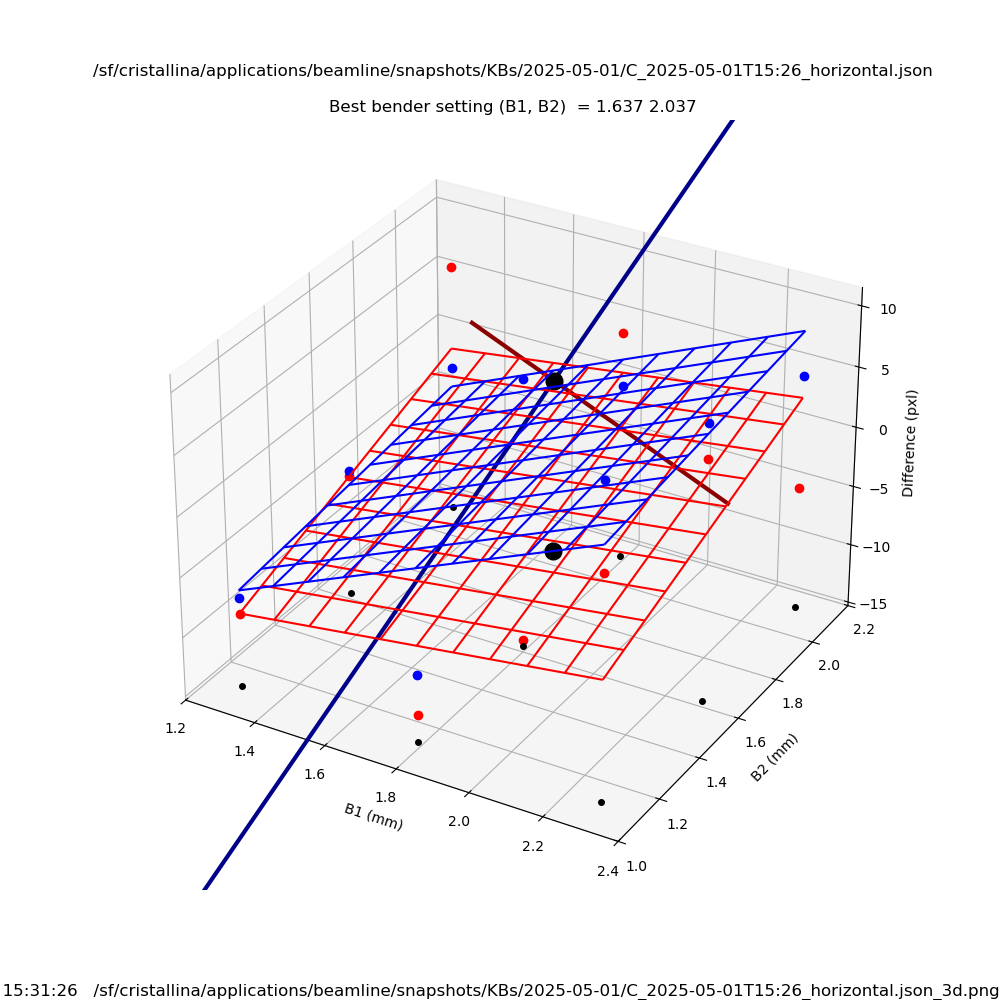

In [40]:
# Load and plot the final data and save the png
saved_file_path = out_fpath.get()
saved_file_path_json = str( saved_file_path.with_suffix(".json") )
d_done = ReadData( saved_file_path_json  )

plotdata(d_done,Plot3D=True,PlotContour=False)

## Vertical focus second

Mesurement is run in a thread, if you want to stop the measurement, stop with **stop_measurement.set()**

In [13]:
stop_measurement=threading.Event()
intermediate_results = []
out_fpath = Queue()

In [14]:
thr=threading.Thread( target=kbV_focusing_acquire,
                      args=(intermediate_results,stop_measurement,out_fpath),
                      kwargs={
    'bender_ds_center': 1.55,
    'bender_us_center': 1.49, 
    'bender_us_span'  : 0.5,
    'bender_ds_span'  : 0.5,
    'bender_npoints'  : 3,
    'bender_us_start' : None,
    'bender_ds_start' : None,
    'aperture_center' : 0,
    'aperture_span'   : 0.3,
    'aperture_npoints': 3,
    'aperture_narrow_dimension' : 0.15,
    'aperture_wide_dimension'   : 2,
    'n_pulses'        : 1,
    'camera_name'     : 'SARES30-CAMS156-XE',
})
thr.start()

2025-05-01 at 15:10:17 | INFO | BU/BD sent to start
2025-05-01 at 15:10:20 | INFO | BU to start:  0.690
2025-05-01 at 15:10:20 | INFO | BD to start:  0.750
2025-05-01 at 15:10:20 | INFO | 
2025-05-01 at 15:10:30 | INFO |       BU / BD positions =  0.990 /  1.050
2025-05-01 at 15:10:32 | INFO |         Aperture position = -0.300; Beam position = -456.282
2025-05-01 at 15:10:35 | INFO |         Aperture position =  0.000; Beam position = -465.272
2025-05-01 at 15:10:38 | INFO |         Aperture position =  0.300; Beam position = -423.303
2025-05-01 at 15:10:54 | INFO |       BU / BD positions =  0.990 /  1.550
2025-05-01 at 15:10:55 | INFO |         Aperture position = -0.300; Beam position = -490.987
2025-05-01 at 15:10:58 | INFO |         Aperture position =  0.000; Beam position = -461.135
2025-05-01 at 15:11:02 | INFO |         Aperture position =  0.300; Beam position = -494.880
2025-05-01 at 15:11:17 | INFO |       BU / BD positions =  0.990 /  2.050
2025-05-01 at 15:11:18 | INFO |

In [5]:
#stop_measurement.set()

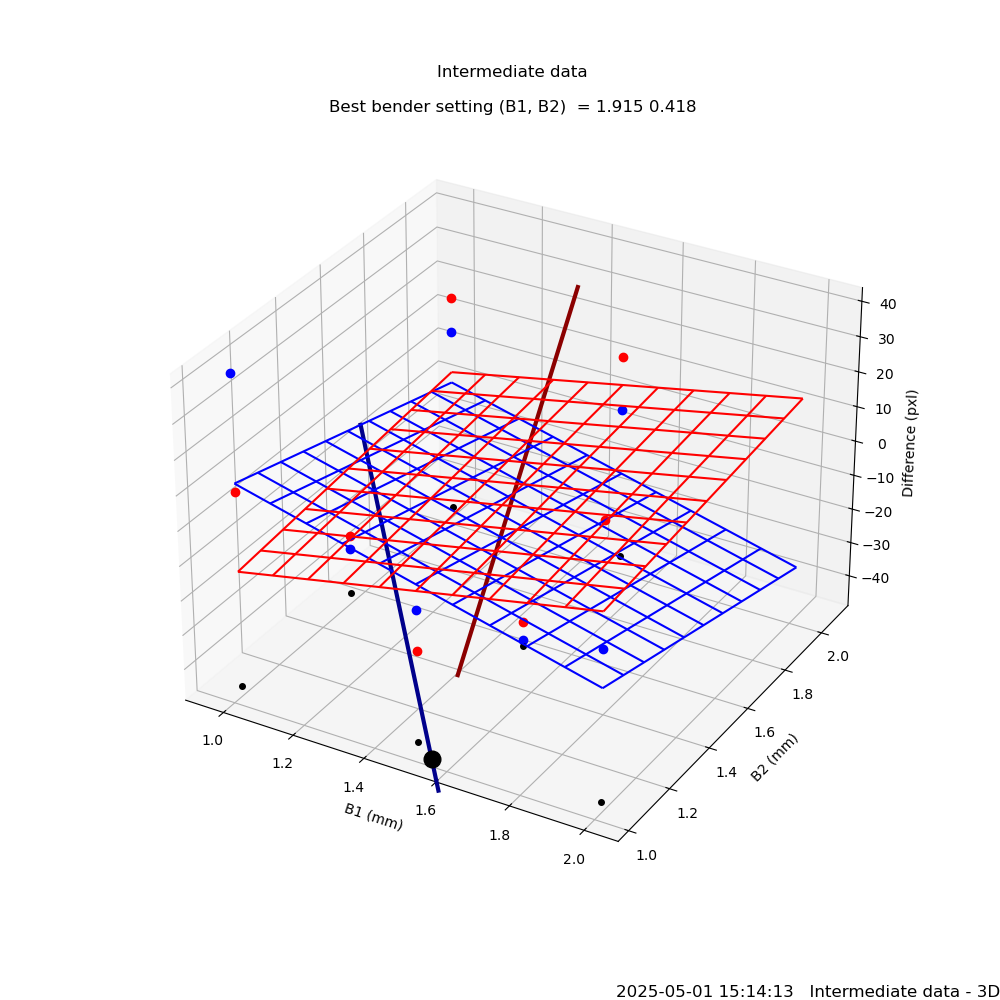

In [15]:
# Load and plot intermediate data
d_intermediate = ReadData(intermediate_results)
intermediate_results

plotdata(d_intermediate,Plot3D=True,PlotContour=False)

open file: /sf/cristallina/applications/beamline/snapshots/KBs/2025-05-01/C_2025-05-01T15:10_vertical.json


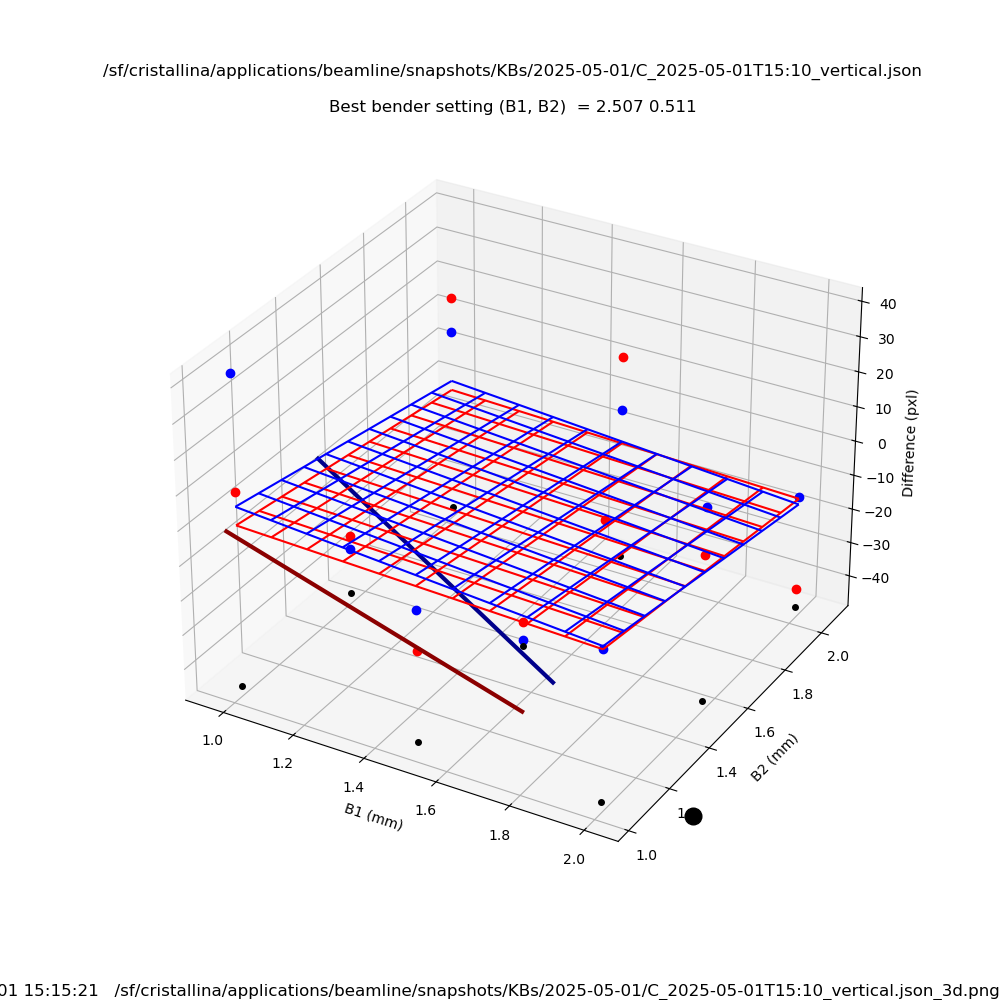

In [18]:
# Load and plot the final data and save the png
saved_file_path = out_fpath.get()
saved_file_path_json = str( saved_file_path.with_suffix(".json") )
d_done = ReadData( saved_file_path_json  )

plotdata(d_done,Plot3D=True,PlotContour=False)